# Unit 5 - Financial Planning

In [109]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [110]:
# Load .env enviroment variables
load_dotenv("../api.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [111]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [112]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 118141879,
   'total_supply': 118141879,
   'max_supply': 0,
   'quotes': {'USD': {'price': 4346.05,
     'volume_24h': 15272952604,
     'market_cap': 513046459487,
     'percentage_change_1h': 0.148663541665651,
     'percentage_change_24h': -1.58495426672016,
     'percentage_change_7d': 8.90415293059499,
     'percent_change_1h': 0.148663541665651,
     'percent_change_24h': -1.58495426672016,
     'percent_change_7d': 8.90415293059499},
    'CAD': {'price': 5384.321345,
     'volume_24h': 18921660981.0956,
     'market_cap': 635613258658.445,
     'percent_change_1h': 0.148663541665651,
     'percent_change_24h': -1.58495426672016,
     'percent_change_7d': 8.90415293059499}},
   'last_updated': 1635625771}},
 'metadata': {'timestamp': 1635625771,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [113]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
crypto_value = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $74343.60
The current value of your 5.3 ETH is $23034.06


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [114]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [115]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [140]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-29", tz="America/New_York").isoformat()
start = pd.Timestamp("2016-10-29", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    limit = 1000
).df

# Preview DataFrame
df.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380  257.73   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306  257.73   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797  257.32   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310  257.40   
2017-11-15 00:00:00-05:00  109.26  109.38  109.14  109.330  1959296  256.62   

                                                               
                               high     low   close    volume  
time                                                           
2017-11-09 00:00:00-05:00  258.3900  256.36  258.20  75322217  
2017-11-10 00:00:00-05:00  258.2100  257.37  258.08  35755951  
2017-11-13 00:00:00-05:00  258.5900  257.27  258.34  31963013  
2017-11-14 00:00:00-05:00  258.3581  256.52  257.75  41935632  
2017-11-15 00:00:00-05:00  257.2200  255.63  256.43  55509843

In [137]:
# Pick AGG and SPY close prices
agg_close_price = df['AGG']['close']['2021-10-29']
spy_close_price = df['SPY']['close']['2021-10-29']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.62
Current SPY closing price: $459.22


In [118]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
shares_value = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22961.00
The current value of your 200 AGG shares is $22924.00


### Savings Health Analysis

In [119]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares = shares_value
crypto = crypto_value

# Create savings DataFrame
data = {'Amount': [crypto, shares]}

df_savings = pd.DataFrame(data, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,97377.665
shares,45885.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

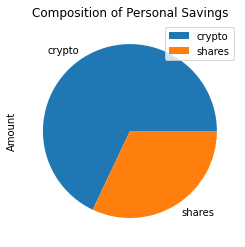

In [120]:
# Plot savings pie chart
df_savings.plot.pie(y = 'Amount', title='Composition of Personal Savings') 

In [121]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (shares + crypto)

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations, you've saved ${(total_savings)}, which is over the ideal emergency fund of ${emergency_fund}!")
elif total_savings == emergency_fund:
    print(f"Congratulations on reaching your goal of saving ${total_savings}!")
else:
    print(f"You need ${emergency_fund - total_savings} more to reach your goal.")

Congratulations, you've saved $143262.66499999998, which is over the ideal emergency fund of $36000!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [107]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-29', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-29', tz='America/New_York').isoformat()

In [152]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000,
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380  257.73   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306  257.73   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797  257.32   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310  257.40   
2017-11-15 00:00:00-05:00  109.26  109.38  109.14  109.330  1959296  256.62   

                                                               
                               high     low   close    volume  
time                                                           
2017-11-09 00:00:00-05:00  258.3900  256.36  258.20  75322217  
2017-11-10 00:00:00-05:00  258.2100  257.37  258.08  35755951  
2017-11-13 00:00:00-05:00  258.5900  257.27  258.34  31963013  
2017-11-14 00:00:00-05:00  258.3581  256.52  257.75  41935632  
2017-11-15 00:00:00-05:00  257.2200  255.63  256.43  55509843

In [153]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 1000,
    num_trading_days = 252 * 30
)

In [154]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310   
2017-11-15 00:00:00-05:00  109.26  109.38  109.14  109.330  1959296   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-11-09 00:00:00-05:00          NaN  257.73  258.3900  256.36  258.20   
2017-11-10 00:00:00-05:00    -0.003976  257.73  258.2100  257.37  258.08   
2017-11-13 00:00:00-05:00    -0.000046  257.32  258.5900  257.27  258.34   
2017-11-14 00:00:00-05:00     0.001147  257.40  258.3581  256.52  257.75   
2017-11-15 00:00:00-05:00     0.002062  256.62  257.2200  255.63  256.43   

                                                  
                             volume daily_return  
time                                              
2017-11-09 00:00:00-05:00  75322217          NaN  
2017-11-10 00:00:00-05:00  35755951    -0.000465  
2017-11-13 00:00:00-05:00  31963013     0.001007  
2017-11-14 00:00:00-05:00  41935632    -0.002284  
2017-11-15 00:00:00-05:00  55509843    -0.005121

In [159]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\anjan\onedrive\desktop\fintech\API-Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998255,0.982913,0.991792,1.007632,1.013051,0.999250,1.008857,0.991730,0.994979,0.998334,...,1.014254,1.002230,0.992586,1.001170,1.018862,0.997828,0.996933,0.996264,1.001299,0.993041
2,0.998629,0.973418,1.001088,1.015392,0.994884,1.007196,1.000628,0.990068,0.995964,0.987865,...,1.024167,1.009792,0.995488,0.999711,1.025677,1.002255,1.005559,0.999314,1.022516,0.989404
3,1.005749,0.960301,1.009135,1.008534,1.005190,1.018293,1.007408,0.991171,0.991389,0.994716,...,1.005647,1.013567,0.997749,0.998480,1.034425,1.006707,1.008865,1.002971,1.020947,0.988974
4,1.011277,0.960156,1.019459,1.022704,0.997412,0.999602,1.011612,0.985697,1.008585,0.986506,...,1.004484,1.007215,0.995879,0.988741,1.033465,0.986066,1.009601,0.998219,1.027312,0.990608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.767968,37.374310,14.977065,7.801724,10.136605,125.285161,7.564475,39.561986,8.474479,26.929491,...,18.877972,55.074194,12.357404,46.037940,22.860135,14.830480,30.294302,8.050678,29.616123,9.748048
7557,5.819945,37.743518,14.932113,7.783643,9.996927,126.418033,7.663336,39.402501,8.446856,26.626440,...,18.808613,55.153793,12.307772,46.013552,23.260731,14.844285,30.323493,8.149501,29.671010,9.899084
7558,5.810890,37.814903,14.995264,7.832872,9.887994,127.797996,7.633277,39.496174,8.347324,26.716936,...,19.011103,54.335347,12.348068,46.413412,23.470604,14.907188,30.185534,8.139013,29.699637,10.032683
7559,5.829498,37.492911,15.190134,7.910220,10.007469,127.065843,7.653805,39.508867,8.259951,26.849317,...,18.840839,54.788797,12.181269,46.994752,23.284872,14.851328,29.970173,8.052999,29.886574,9.917407


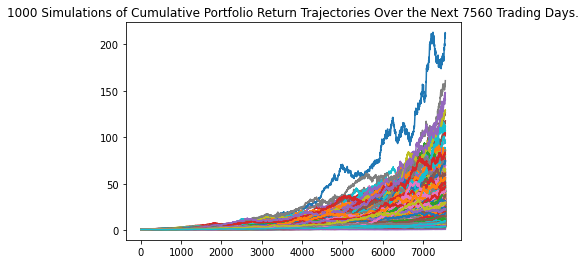

In [160]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

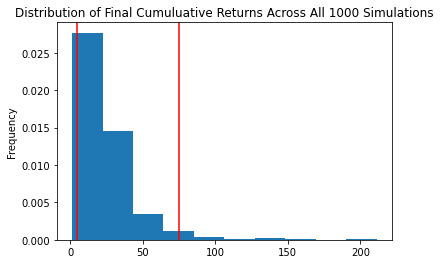

In [161]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [162]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean              24.590248
std               19.767037
min                1.214599
25%               12.100152
50%               19.263019
75%               30.787389
max              211.146489
95% CI Lower       4.562021
95% CI Upper      74.868756
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [163]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91240.42 and $1497375.13


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [164]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $136860.63 and $2246062.69


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [165]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 1000,
    num_trading_days = 252 * 5
)

In [166]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\anjan\onedrive\desktop\fintech\API-Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000274,1.009734,0.995203,1.009540,0.993757,0.981712,0.992118,1.000471,1.005511,1.006785,...,0.994316,0.980644,1.007041,1.000542,1.004747,0.986281,1.000343,0.991518,0.992729,0.998394
2,1.002420,1.021724,0.980640,0.998556,0.987718,0.983146,0.986858,1.000208,1.001605,1.013828,...,0.992030,0.975831,1.010113,1.006439,1.009794,0.982144,1.002386,0.996439,1.001817,1.012954
3,1.014681,1.041042,0.981714,1.005048,0.997740,0.971071,1.011314,0.992092,1.003019,1.010901,...,0.997036,0.968896,1.022276,1.022340,1.005901,0.966587,0.997571,0.986903,1.001589,1.020039
4,1.009347,1.050234,0.987004,1.010321,0.998126,0.987373,1.004656,1.007889,0.995270,1.017722,...,1.001052,0.971320,1.021011,1.013857,1.003905,0.969304,0.999904,0.982637,1.001105,1.020870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.852048,0.967170,1.429235,1.555818,1.575101,1.458269,1.723361,1.108374,2.834766,2.156997,...,1.873732,1.620163,1.472020,0.839183,1.463988,1.276013,1.185806,2.121606,1.958900,0.888611
1257,1.830073,0.978144,1.427766,1.566497,1.581044,1.463402,1.711943,1.129766,2.847536,2.152952,...,1.852501,1.661006,1.465876,0.838082,1.475135,1.279756,1.186378,2.129563,1.941184,0.891524
1258,1.841381,0.973790,1.436204,1.558336,1.574286,1.447742,1.714401,1.118475,2.822863,2.133183,...,1.842164,1.665426,1.468737,0.846364,1.478119,1.279737,1.181229,2.132235,1.959121,0.883222
1259,1.826359,0.958841,1.437739,1.561362,1.567545,1.459487,1.740268,1.116827,2.840339,2.135489,...,1.860734,1.678181,1.496213,0.850323,1.488397,1.278509,1.173446,2.118645,1.936271,0.895730


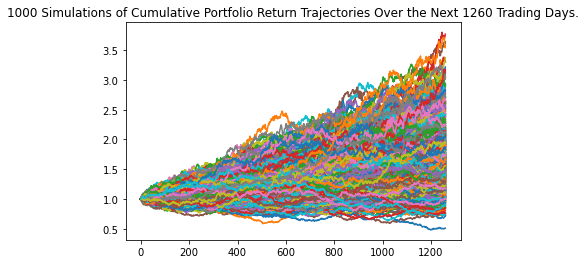

In [167]:
# Plot simulation outcomes
line_plot_5year = MC_5year.plot_simulation()

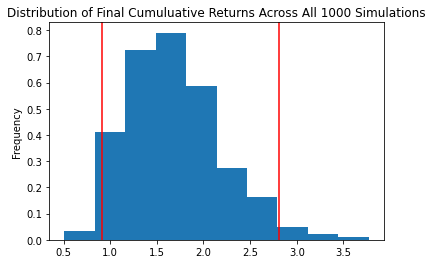

In [168]:
# Plot probability distribution and confidence intervals
dist_plot_5year = MC_5year.plot_distribution()

In [169]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5year = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5year)

count           1000.000000
mean               1.684479
std                0.497405
min                0.508096
25%                1.334769
50%                1.615333
75%                1.978395
max                3.771071
95% CI Lower       0.915981
95% CI Upper       2.810386
Name: 1260, dtype: float64


In [172]:
# Set initial investment
initial_investment_5year = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5year[8] * initial_investment_5year,2)
ci_upper_five = round(tbl_5year[9] * initial_investment_5year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $54958.85 and $168623.17


### Ten Years Retirement Option

In [174]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 1000,
    num_trading_days = 252 * 10
)

In [175]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\anjan\onedrive\desktop\fintech\API-Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994118,0.998016,0.996042,0.994465,1.004831,0.992453,1.004377,1.006715,0.989145,0.988953,...,1.000704,1.006014,1.003879,1.008248,1.005486,1.002825,1.003095,1.006671,0.986853,0.997932
2,0.997973,0.995418,0.995233,1.007019,1.009193,0.992609,0.989525,1.014998,0.980348,1.005574,...,0.998340,1.008498,0.990732,1.004271,1.002030,0.999865,0.996882,1.000967,0.985842,0.998366
3,1.001249,0.992981,0.993302,1.012499,1.021733,0.982102,1.001098,1.013463,0.970854,0.997079,...,0.982937,1.015778,0.990939,0.990533,0.998475,1.002880,1.016318,0.996412,0.984825,1.000255
4,1.000015,0.988669,0.987115,1.022853,1.012630,0.983377,0.991348,1.011674,0.972130,1.005065,...,0.965146,0.995758,0.994379,0.987395,1.000557,0.992931,1.017252,0.975775,0.994386,1.009684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.985840,2.350370,3.137591,1.929095,4.023906,0.948110,1.662611,2.128466,4.521762,2.012805,...,1.686786,4.113135,4.079056,1.854616,2.984281,2.071972,1.949935,1.121014,1.596216,3.936636
2517,1.995510,2.400021,3.115551,1.924272,3.977795,0.955408,1.663799,2.152138,4.494783,2.010661,...,1.675075,4.104106,4.105116,1.861813,2.991180,2.071058,1.961669,1.106594,1.604591,3.956128
2518,1.992433,2.388855,3.102595,1.923975,3.969054,0.953233,1.678574,2.142828,4.429982,1.987442,...,1.677767,4.150559,4.083857,1.864249,3.026993,2.091353,1.938601,1.100225,1.592686,3.922452
2519,2.005056,2.408159,3.100092,1.947583,3.974871,0.957048,1.670373,2.154945,4.445641,2.000015,...,1.669309,4.141277,4.053545,1.868838,3.016500,2.100889,1.911280,1.118219,1.581561,3.919961


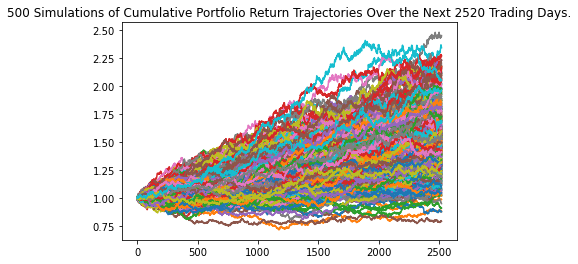

In [32]:
# Plot simulation outcomes
line_plot_10year = MC_10year.plot_simulation()

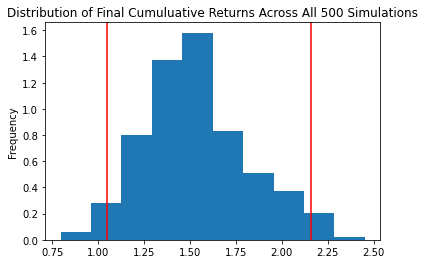

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_10year = MC_10year.plot_distribution()

In [176]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10year = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10year)

count           1000.000000
mean               2.835240
std                1.208925
min                0.658292
25%                2.000620
50%                2.602907
75%                3.434582
max               12.047984
95% CI Lower       1.193751
95% CI Upper       5.842597
Name: 2520, dtype: float64


In [178]:
# Set initial investment
initial_investment_10year = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10year[8] * initial_investment_10year,2)
ci_upper_ten = round(tbl_10year[9] * initial_investment_10year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $71625.06 and $350555.83
